In [1]:
import torch
import torchvision

print(torch.__version__)
print(torch.cuda.is_available())

2.5.1+cu124
True


In [1]:
import torch

# Cek apakah CUDA tersedia
print("CUDA tersedia:", torch.cuda.is_available())

# Cek perangkat default yang digunakan
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device yang digunakan:", device)

# Jika GPU tersedia, cek nama GPU
if torch.cuda.is_available():
    print("GPU yang digunakan:", torch.cuda.get_device_name(0))

CUDA tersedia: True
Device yang digunakan: cuda
GPU yang digunakan: NVIDIA GeForce RTX 3050 Laptop GPU


In [4]:
from ultralytics import YOLO

In [ ]:
# Instalasi YOLOv8
!pip install ultralytics -q

# Impor pustaka
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os

# Langkah 1: Persiapan Dataset
# Pastikan dataset Anda dalam format COCO (path to dataset JSON)
train_data_path = '/path/to/train/dataset'
val_data_path = '/path/to/val/dataset'

# Langkah 2: Inisialisasi Model YOLOv8
# Model dapat menggunakan YOLOv8s (small), YOLOv8m (medium), atau lainnya
model = YOLO('yolov8s.pt')  # Pretrained model dari YOLOv8

# Langkah 3: Melatih Model
# Pelatihan model menggunakan dataset COCO
model.train(data={
    "train": train_data_path,
    "val": val_data_path,
    "nc": 3,  # Jumlah kelas (contoh: scratch, dent, broken)
    "names": ["scratch", "dent", "broken"]  # Nama kategori
}, epochs=50, batch=16, imgsz=640)

# Langkah 4: Evaluasi Model
# Metrik evaluasi seperti mAP dapat langsung dihitung
metrics = model.val()
print("Evaluation metrics: ", metrics)

# Langkah 5: Inferensi pada Gambar Baru
# Gunakan model untuk mendeteksi kerusakan pada gambar baru
test_image_path = '/path/to/test/image.jpg'
results = model.predict(source=test_image_path, save=True, conf=0.25)

# Menampilkan hasil deteksi
for result in results:
    boxes = result.boxes  # Bounding box hasil deteksi
    print("Detected objects:", boxes)

    # Menampilkan gambar dengan anotasi
    annotated_image = result.plot()
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

# Langkah 6: Menyimpan Model yang Sudah Dilatih
# Menyimpan model hasil pelatihan untuk digunakan di masa mendatang
model.save('yolov8-car-damage.pt')

# Langkah 7: Deploy Model
# Model dapat di-export ke format ONNX, CoreML, dll.
model.export(format='onnx')  # Ekspor model ke format ONNX


In [50]:
from pycocotools.coco import COCO

dataType='val'
imageDir = 'D:/Datasets/riset_infor_dataset/Car_Damage_Coco_Dataset_Combined/images/{}/'.format(dataType)
ann = "D:/Datasets/riset_infor_dataset/Car_Damage_Coco_Dataset_Combined/annotations/val.json"
# Initialize the COCO api for instance annotations
coco=COCO(ann)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [51]:
ids = 1
cats = coco.loadCats(ids=ids)
print(cats)

[{'id': 1, 'name': 'Car-Damage', 'supercategory': 'none'}]


In [52]:
category_ids = coco.getCatIds()
num_categories = len(category_ids)
print('number of categories: ',num_categories)
for ids in category_ids:
    cats = coco.loadCats(ids=ids)
    print(cats)

number of categories:  1
[{'id': 1, 'name': 'Car-Damage', 'supercategory': 'none'}]


In [34]:
image_ids = coco.getImgIds()
image_id = image_ids[9]  
image_info = coco.loadImgs(image_id)
print(image_info)

[{'coco_url': '', 'date_captured': '2020-07-14 09:59:34.190485', 'file_name': '8.jpg', 'flickr_url': '', 'height': 1024, 'id': 9, 'license': 1, 'width': 1024}]


In [35]:
annotation_ids = coco.getAnnIds(imgIds=image_id)
annotations = coco.loadAnns(annotation_ids)
print(annotations)

[{'area': 41467.49999999993, 'bbox': [373, 143, 325, 301], 'category_id': 1, 'id': 19, 'image_id': 9, 'iscrowd': 0, 'segmentation': [[373, 243, 415, 162, 490, 149, 563, 143, 613, 146, 652, 184, 674, 212, 675, 248, 680, 363, 698, 426, 691, 444, 620, 384, 602, 377, 559, 330, 518, 300, 468, 268, 413, 258]]}, {'area': 7297.499999999999, 'bbox': [668, 505, 317, 320], 'category_id': 1, 'id': 20, 'image_id': 9, 'iscrowd': 0, 'segmentation': [[672, 546, 747, 536, 820, 517, 897, 505, 933, 515, 985, 542, 983, 571, 943, 576, 923, 618, 898, 653, 900, 672, 917, 691, 927, 710, 929, 733, 894, 791, 850, 817, 795, 825, 755, 814, 716, 776, 717, 725, 694, 671, 679, 620, 668, 575]]}]


In [37]:
# Get category ids that satisfy the given filter conditions
filterClasses = ['damage']
# filterClasses = ['This-Class-Doesnt-Exist']
# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses)
print(catIds)

[1]


In [38]:
# Load category information for the given ID
catID = 1
print(coco.loadCats(ids=catID))

# Get image ID that satisfies the given filter conditions
imgId = coco.getImgIds(catIds=[catID])[0]
print(imgId)

[{'id': 1, 'name': 'damage', 'supercategory': 'part'}]
0


In [39]:
ann_ids = coco.getAnnIds(imgIds=[imgId], iscrowd=None)
print(ann_ids)

[0, 1]


[11, 12]
Annotations for Image ID 9:
69_jpg.rf.7abf8e116e0abfaca60a3c1f40f0306c.jpg


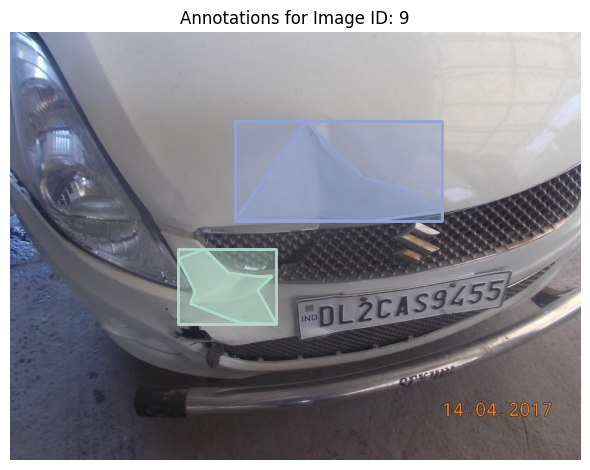

In [56]:
import matplotlib.pyplot as plt

imgId = 9

ann_ids = coco.getAnnIds(imgIds=[imgId], iscrowd=None)
print(ann_ids)

print(f"Annotations for Image ID {imgId}:")
anns = coco.loadAnns(ann_ids)

image_path = coco.loadImgs(imgId)[0]['file_name']
print(image_path)
image = plt.imread(imageDir + image_path)
plt.imshow(image)

# Display the specified annotations
coco.showAnns(anns, draw_bbox=True)

plt.axis('off')
plt.title('Annotations for Image ID: {}'.format(image_id))
plt.tight_layout()
plt.show()